# Workbook 00 - Solving beams with `PyNite`

In [1]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

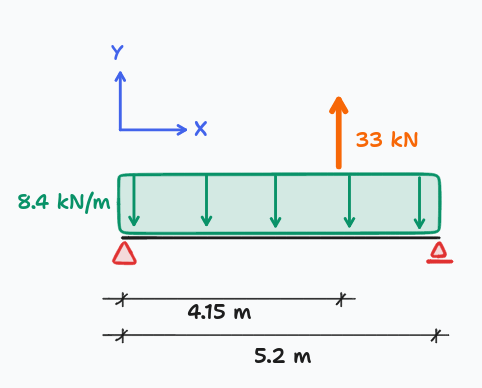

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

{'ULS001': 29484.0, 'ULS002': 19488.80769230769}
{'ULS001': 29484.000000000004, 'ULS002': -10020.807692307688}


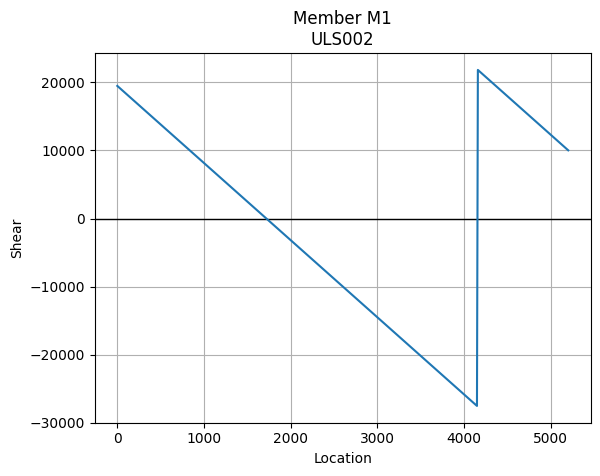

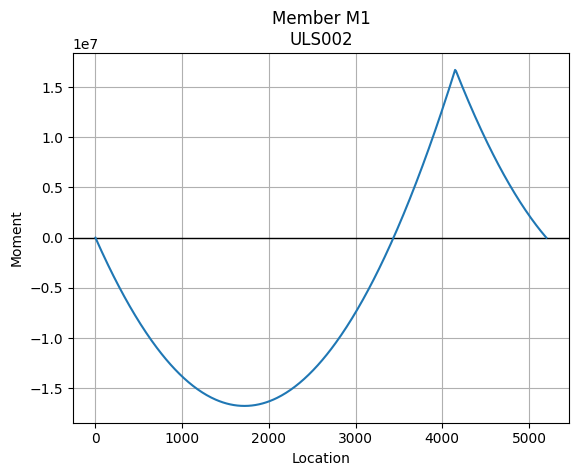

In [33]:
#creating an instance of the beam model
beam_model = FEModel3D()

#Adding nodes on the beam
beam_model.add_node("node 1",0,0,0)
beam_model.add_node("node 2",5200,0,0)

#Adding beam members
beam_model.add_member(name = "M1",i_node = "node 1",j_node = "node 2",E = 23000,G=1, Iy=1, Iz=400e6, J=1, A=1500)

#Adding beam supports
beam_model.def_support("node 1",support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False) 
beam_model.def_support("node 2",False,True,True,False,False,False)

#Addind load combination
beam_model.add_load_combo("ULS001",{'D':1.35})
beam_model.add_load_combo("ULS002",{'D':1.35,'L':1.5})

#Adding Uniform distributed loads
beam_model.add_member_dist_load(Member = 'M1', Direction = 'Fy',w1 = -8.4, w2 = -8.4, x1 = 0, x2 = 5200, case = 'D')
beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=33000, x=4150, case="L")

#Analyzing the beam
beam_model.analyze(check_stability = True)

#Printing nodal reactions
print(beam_model.Nodes['node 1'].RxnFY)
print(beam_model.Nodes['node 2'].RxnFY)

#Display Shear Diagram
beam_model.Members['M1'].plot_shear(Direction="Fy", combo_name="ULS002", n_points = 500)

#Display Moment Diagram
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="ULS002", n_points=500)

#render_model(beam_model, combo_name='ULS002',annotation_size=100)


# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.